In [1]:
# reload automatically the modules when they change
%load_ext autoreload
%autoreload 2

# add the current directory to the python search path
import sys
sys.path.insert(0, ".")

In [2]:
from scipy import signal
import numpy as np
import pandas as pd
from src.plot_raw import plot_raw
from matplotlib import pyplot as plt

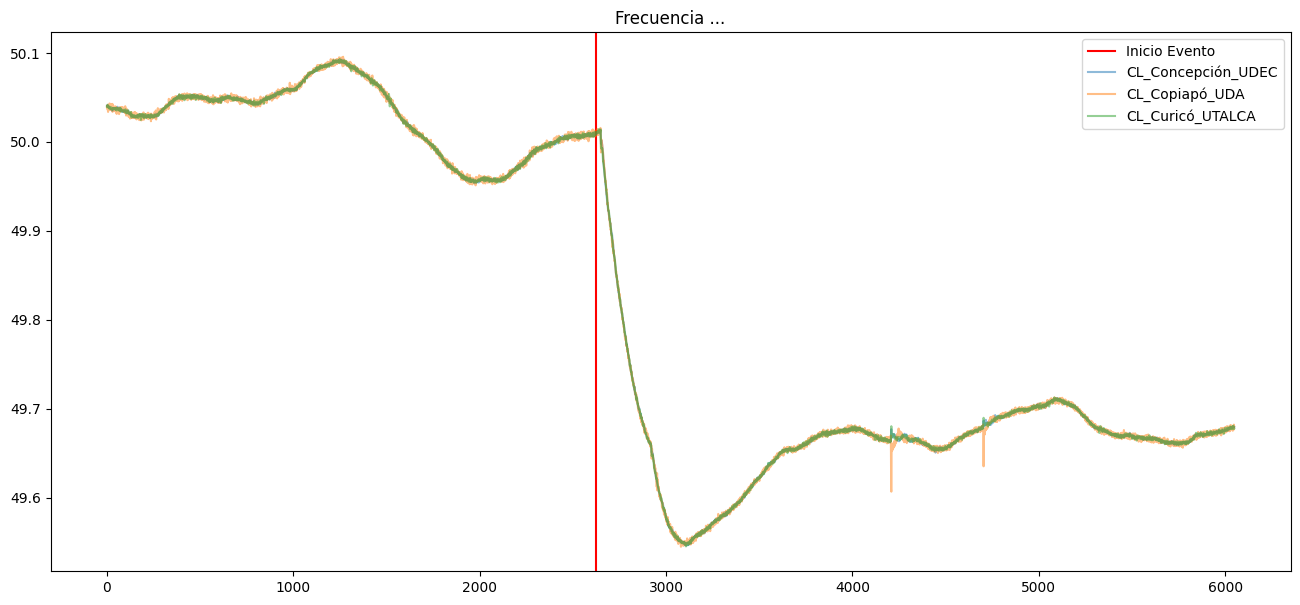

In [3]:
## Ejemplo uso plot_raw

input_path = "./data/test/2023_02_13-14_08_10.csv"
fig = plot_raw(input_path)

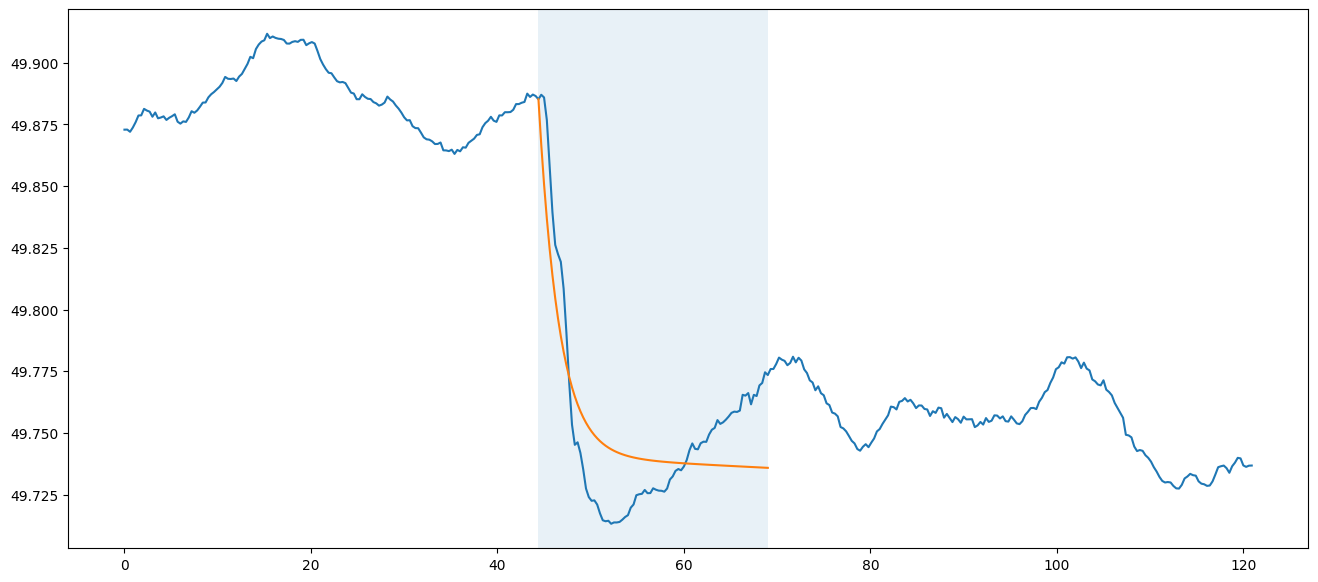

In [133]:
## EJemplo uso scipy.optimize.differential_evolution y plot_result
from src.sampler import sampler
from scipy.optimize import differential_evolution
from src.objective_function import objective_function
from src.plot_result import plot_result

input_path = "./data/raw/2021 set n1/2021_05_02-16_44_00.csv"

model = 1
Ts = 0.3
df = sampler(input_path, Ts, event_time=25)
P0 = df["power"][0] / 1000


event_freq = df["freq"][df["event"]==1].to_numpy()

bounds = [(0.00001, 1000) for i in range(6)]
arguments = (model, Ts, P0, event_freq)
result = differential_evolution(objective_function, bounds, args=(arguments,))

fig = plot_result(df, arguments, result.x)

In [10]:
# Ejemplo uso objective_function
from src.objective_function import objective_function

Kd = 1.479
K = 5.105
Ta = 0.0001
Tb = 0.0001
Tc = 7.652
Td = 1.977
params = [Ta,Tb,Tc,Td,K,Kd]

model =1
Ts = 0.1

input_path = "./data/test/2023_02_13-14_08_10_Sampling_100ms.csv"
df = pd.read_csv(input_path)
event_freq = df["Frecuencia [Hz]"][df["Evento"]==1].to_numpy()

P0 = df["Potencia [MW]"][0]/1000

args = (model, Ts, P0, event_freq)

objective_function(params, args)

428159.742116734


428159.742116734